# <b> Datasets

In [1]:
# These are the libraries will be used for this lab.
from resources.utils.headers import *
%matplotlib inline  

### <b> Simple Datasets


In [2]:
# define class for the toy dataset
class toy_set(Dataset):
    
    # Constructor (with no default value)
    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 2 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        self.transform = transform
    
    # Getter
    def __getitem__(self, index):
        # if transform not none return sample transformed
        # else return sample 
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    # Get lentgh
    def __len__(self):
        return self.len

In [3]:
our_data = toy_set()

In [4]:
print('Toy data = ', our_data)

Toy data =  <__main__.toy_set object at 0x7fd6d5e87dd0>


In [5]:
print('Value on index 0 of our toy data = ', our_data[0])

Value on index 0 of our toy data =  (tensor([2., 2.]), tensor([1.]))


In [6]:
print('Toy length = ', len(our_data))

Toy length =  100


In [7]:
for i in range(3):
    x, y = our_data[i]
    print(i, x, y)

0 tensor([2., 2.]) tensor([1.])
1 tensor([2., 2.]) tensor([1.])
2 tensor([2., 2.]) tensor([1.])


#### <b> Transforms and Compose


Transforms are common image transformations. They can be chained together using Compose

Transforms are also used to normalize or standardize the data

In [8]:
# Create tranform class add_mult

class add_mult(object):
    
    # Constructor
    def __init__(self, addx = 1, muly = 1):
        self.addx = addx
        self.muly = muly
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

#### <b> Calling methot without transform

In [9]:
data_set = toy_set()
a_m = add_mult()
x_, y_ = a_m(data_set[0])
print(x_, y_)

tensor([3., 3.]) tensor([1.])


#### <b> Calling methot with transform

In [10]:
a_m_ = add_mult()
dataset_ = toy_set(transform = a_m)
x_, y_ = a_m(dataset_[0])
print(x_, y_)

tensor([4., 4.]) tensor([1.])


In [11]:
class mult (object):
    
    # Constructor
    def __init__(self, mult = 100):
        self.mult = mult
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult
        y = y * self.mult
        sample = x, y
        return sample

In [12]:
data_transform = transforms.Compose([add_mult(), mult()])

In [13]:
print(data_set[0])

(tensor([2., 2.]), tensor([1.]))


In [14]:
print(data_transform)

Compose(
)


In [15]:
data_transform(data_set[0])

(tensor([300., 300.]), tensor([100.]))

### <b> Image Datasets


#### <b> Load Datasets


In [16]:
# Read CSV file from the URL and print out the first five samples
directory="../Datasets/cognitive/"
csv_file ='index.csv'
csv_path = os.path.join(directory,csv_file)

#### <b>Exploratory Data Analysis


In [17]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [18]:
data_name['category'].unique()

array(['Ankle boot', 'T-shirt', 'Dress', 'Pullover', 'Sneaker', 'Sandal',
       'Trouser', 'Shirt', 'Coat', 'Bag'], dtype=object)

In [19]:
print('File name:', data_name.iloc[0, 1])

File name: img/fashion0.png


In [20]:
print('y:', data_name.iloc[0, 0])

y: Ankle boot


In [21]:
print('The number of rows: ', data_name.shape[0])

The number of rows:  60000


#### <b>Load Image


In [22]:
image_name = data_name.iloc[1, 1]
image_name

'img/fashion1.png'

In [23]:
image_path = os.path.join(directory, image_name)
image_path

'../Datasets/cognitive/img/fashion1.png'

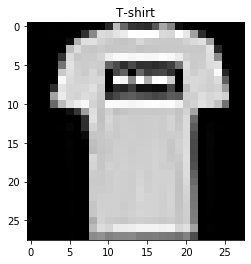

In [24]:
# Plot the second training image
image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

#### <b> Dataset Class

In [25]:
class my_dataset(Dataset):
    
    # constructor
    def __init__(self, csv_file, data_dir, transform = None):
        
        # image directory
        self.data_dir = data_dir
        
        # transforms for image
        self.transform = transform
        data_dir_csv = os.path.join(self.data_dir, csv_file)
        
        # load csv files with images
        self.data_name = pd.read_csv(data_dir_csv)
        
        # number of images in dataset
        self.len = self.data_name.shape[0]
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, idx):
        
        # image file path
        img_name = os.path.join(self.data_dir, self.data_name.iloc[idx,1])
        
        # open image file
        image = Image.open(img_name)
        
        # the class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # if transform apply it into image
        if self.transform:
            image = self.transform(image)
            
        return image, y

In [26]:
# Create the dataset objects
dataset = my_dataset(csv_file = csv_file, data_dir = directory)

In [27]:
img = dataset[0][0]
y = dataset[0][1]

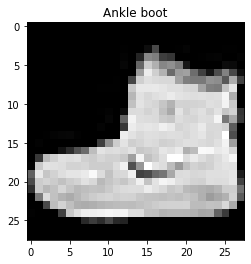

In [28]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

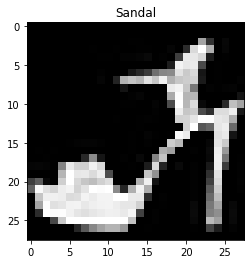

In [29]:
image = dataset[9][0]
y = dataset[9][1]

plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(y)
plt.show()

#### <b> Transforms

In [30]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [31]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = my_dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
print("The shape of the first element tensor: ", dataset[0][0].shape)

The shape of the first element tensor:  torch.Size([1, 20, 20])


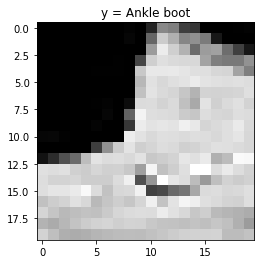

In [32]:
show_data(dataset[0],shape = (20, 20))

# <b> Pre-built Datasets

### Load Datasets


In [33]:

dataset = dsets.MNIST(
    root = 'resources/data', 
    train = False, 
    download = True, 
    transform = transforms.ToTensor()
)

### Exploratory Data Analysis


In [34]:
# Examine whether the elements in dataset MNIST are tuples, and what is in the tuple?

print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  7
The type of the second element in the tuple:  <class 'int'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


In [35]:
# Show data by diagram
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

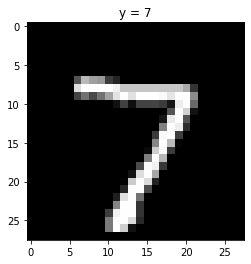

In [36]:
show_data(dataset[0])

### TorchVision Transforms


In [37]:
crop = transforms.Compose([transforms.CenterCrop(10), transforms.ToTensor()])
dataset = dsets.MNIST(root = 'resources/data', train = False, download= True, transform=crop)

In [38]:
print('Shape = ', dataset[0][0].shape)

Shape =  torch.Size([1, 10, 10])


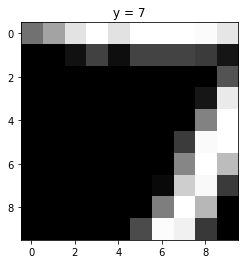

In [39]:
show_data(dataset[0],shape = (10, 10))

In [40]:
crop = transforms.Compose([transforms.CenterCrop(50), transforms.ToTensor()])
dataset = dsets.MNIST(root = 'resources/data', train = False, download= True, transform=crop)

In [41]:
print('Shape = ', dataset[0][0].shape)

Shape =  torch.Size([1, 50, 50])


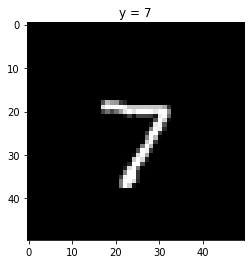

In [42]:
show_data(dataset[0],shape = (50, 50))